In [35]:
import numpy as np
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [ ]:


# Conexión a Snowflake
conn = snowflake.connector.connect(
    user='TFMGRUPO4',
    password='TFMgrupo4ucm01_01#',
    account='WYNIFVB-YE01854',
    warehouse='COMPUTE_WH',
    database='YAHOO_FINANCE',
    schema='MACHINE_LEARNING',
    role='ACCOUNTADMIN'
)

In [2]:

# Tickers del IBEX 35 (5 principales)
tickers = [
    "IBE.MC",    # Iberdrola (Energía)
    "ITX.MC",    # Inditex (Textil/Retail)
    "TEF.MC",    # Telefónica (Telecomunicaciones)
    "BBVA.MC",   # BBVA (Banca)
    "SAN.MC",    # Santander (Banca)
    "REP.MC",    # Repsol (Petróleo y Gas)
    "AENA.MC",   # Aena (Aeropuertos/Infraestructura)
    "IAG.MC",    # International Airlines Group (Aerolíneas)
    "ENG.MC",    # Enagás (Infraestructura energética)
    "ACS.MC",    # ACS (Construcción e Infraestructura)
    "FER.MC",    # Ferrovial (Infraestructura y Construcción)
    "CABK.MC",   # CaixaBank (Banca)
    "ELE.MC",    # Endesa (Energía eléctrica)
    "MAP.MC"     # Mapfre (Seguros)
]
fecha_inicio = "2020-01-01"
fecha_fin = "2024-12-31"

In [3]:
# Query para extraer datos de Snowflake
quoted_tickers = ",".join([f"'{ticker}'" for ticker in tickers])
query = f"""
SELECT TICKER, FECHA, CLOSE
FROM TICKERS_INDEX
WHERE TICKER IN ({quoted_tickers})
  AND FECHA BETWEEN '{fecha_inicio}' AND '{fecha_fin}'
  AND CLOSE IS NOT NULL
ORDER BY FECHA, TICKER
"""

# Ejecutar query usando cursor (elimina la advertencia)
cursor = conn.cursor()
cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
df_prices = pd.DataFrame(cursor.fetchall(), columns=column_names)
cursor.close()
conn.close()


In [4]:
df_prices.head()

,TICKER,FECHA,CLOSE
0,ACS.MC,2020-01-02,34.785518650
1,AENA.MC,2020-01-02,171.300003100
2,BBVA.MC,2020-01-02,5.110000134
3,CABK.MC,2020-01-02,2.898999929
4,ELE.MC,2020-01-02,23.870000840


In [5]:
df_prices.dtypes

TICKER            object
FECHA     datetime64[ns]
CLOSE             object
dtype: object

In [7]:
df_prices['CLOSE'] = df_prices['CLOSE'].astype(float)
df_prices['FECHA'] = pd.to_datetime(df_prices['FECHA'])
df_prices.dtypes

TICKER            object
FECHA     datetime64[ns]
CLOSE            float64
dtype: object

In [8]:
prices = df_prices.pivot(index='FECHA', columns='TICKER', values='CLOSE').sort_index()

In [9]:
prices.head()

TICKER,ACS.MC,AENA.MC,BBVA.MC,CABK.MC,ELE.MC,FER.MC,IBE.MC,ITX.MC,MAP.MC,REP.MC,TEF.MC
FECHA,,,,,,,,,,,
2020-01-02,34.785519,171.300003,5.110,2.899,23.870001,27.290001,9.220,31.750000,2.414,14.065,6.332
2020-01-03,34.360458,170.100006,5.054,2.874,23.820000,27.100000,9.178,31.809999,2.397,14.240,6.337
2020-01-06,34.142986,169.000000,5.032,2.863,23.670000,27.090000,9.132,31.530001,2.402,14.350,6.345
2020-01-07,34.241840,168.250000,5.010,2.885,23.170000,27.500000,8.954,31.930000,2.400,14.230,6.249
2020-01-08,34.340691,168.600006,5.058,2.886,23.000000,27.660000,8.984,32.000000,2.400,14.360,6.161


In [11]:
prices.describe()

TICKER,ACS.MC,AENA.MC,BBVA.MC,CABK.MC,ELE.MC,FER.MC,IBE.MC,ITX.MC,MAP.MC,REP.MC,TEF.MC
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,28.655447,145.819773,5.984912,3.279762,19.961258,27.574469,10.895413,31.364367,1.878753,11.796338,4.013553
std,7.219628,23.660736,2.218465,1.066651,2.179751,5.237308,1.070553,8.742121,0.269211,2.582094,0.553764
min,11.313448,91.900002,2.160000,1.522000,14.270000,17.490000,8.152000,19.709999,1.280000,5.226000,2.794000
25%,22.854252,129.787502,4.511875,2.507500,18.373750,23.910000,10.253750,24.430000,1.687000,10.097500,3.697375
50%,26.536437,142.000000,5.500000,3.166500,19.605000,25.884999,10.812500,29.134999,1.840750,12.065000,3.950000
75%,33.122355,155.025002,7.443000,3.858000,21.360001,29.712499,11.436250,34.970001,1.985000,13.891250,4.210250
max,48.139999,210.399994,11.235000,5.854000,26.120001,41.040001,14.175000,55.980000,2.692000,16.174999,6.540000


In [13]:
prices.isnull().sum()

TICKER
ACS.MC     0
AENA.MC    0
BBVA.MC    0
CABK.MC    0
ELE.MC     0
FER.MC     0
IBE.MC     0
ITX.MC     0
MAP.MC     0
REP.MC     0
TEF.MC     0
dtype: int64

In [14]:
prices.head()

TICKER,ACS.MC,AENA.MC,BBVA.MC,CABK.MC,ELE.MC,FER.MC,IBE.MC,ITX.MC,MAP.MC,REP.MC,TEF.MC
FECHA,,,,,,,,,,,
2020-01-02,34.785519,171.300003,5.110,2.899,23.870001,27.290001,9.220,31.750000,2.414,14.065,6.332
2020-01-03,34.360458,170.100006,5.054,2.874,23.820000,27.100000,9.178,31.809999,2.397,14.240,6.337
2020-01-06,34.142986,169.000000,5.032,2.863,23.670000,27.090000,9.132,31.530001,2.402,14.350,6.345
2020-01-07,34.241840,168.250000,5.010,2.885,23.170000,27.500000,8.954,31.930000,2.400,14.230,6.249
2020-01-08,34.340691,168.600006,5.058,2.886,23.000000,27.660000,8.984,32.000000,2.400,14.360,6.161


In [15]:
# Calculos de los rendimientos
rendimientos = (prices - prices.shift(1)) / prices.shift(1)

In [16]:
numero_activos = len(rendimientos.columns)

In [17]:
rendimientos_portafolio = []
riesgo_portafolio = []
peso_portafolio = []

In [18]:
for x in range(5000):
    pesos = np.random.random(numero_activos)
    pesos /= np.sum(pesos)
    rendimiento = np.sum(pesos * rendimientos.mean()) * 252
    riesgo = np.sqrt(np.dot(pesos.T, np.dot(rendimientos.cov() * 252, pesos)))
    rendimientos_portafolio.append(rendimiento)
    riesgo_portafolio.append(riesgo)
    peso_portafolio.append(pesos)


In [19]:
peso_portafolio

[array([0.00727593, 0.12898802, 0.19883275, 0.02562745, 0.06415372,
        0.08324434, 0.07216331, 0.0794372 , 0.06120283, 0.17465099,
        0.10442345]),
 array([0.0387874 , 0.0747616 , 0.03684307, 0.0487231 , 0.06453765,
        0.13013028, 0.12510307, 0.15504323, 0.15977784, 0.07297717,
        0.09331558]),
 array([0.08669807, 0.1612954 , 0.02607094, 0.1543767 , 0.08380918,
        0.09556437, 0.00981157, 0.12958417, 0.07688034, 0.14768311,
        0.02822615]),
 array([0.04404143, 0.04963236, 0.11227008, 0.14436238, 0.07550362,
        0.14048558, 0.14052046, 0.06324427, 0.03655226, 0.11716819,
        0.07621937]),
 array([0.11934997, 0.07897296, 0.02437203, 0.08863098, 0.02735848,
        0.16794062, 0.22472902, 0.1007538 , 0.01035052, 0.03187365,
        0.12566797]),
 array([0.05015131, 0.13458352, 0.11415742, 0.08076938, 0.03677398,
        0.09805038, 0.12828983, 0.09391819, 0.10526482, 0.01543049,
        0.14261068]),
 array([0.08658619, 0.14210982, 0.1052635 , 0.022068

In [20]:
rendimientos_portafolio

[0.08335378411528048,
 0.07815671417848515,
 0.09137537577850655,
 0.09617976629006866,
 0.09136748077277017,
 0.08778424321201736,
 0.0804139455640256,
 0.07741790571247335,
 0.08020718072289224,
 0.07786795705900657,
 0.07462714987155827,
 0.11065752497214315,
 0.11249749828702688,
 0.05858853321852294,
 0.11958474180615555,
 0.08923080417654211,
 0.09140369929249613,
 0.08685128204478719,
 0.09643588251018038,
 0.09495888293519746,
 0.05740664411853095,
 0.08222652791968654,
 0.07734012279881969,
 0.1188548823471368,
 0.08638739694220081,
 0.10281266391873968,
 0.08572914503412149,
 0.10238856449844705,
 0.05704597970899578,
 0.07543927057415854,
 0.0765413120543283,
 0.09812334645834725,
 0.07617495031509693,
 0.09261775468997373,
 0.08291408956065756,
 0.08381763909392545,
 0.0884142393839596,
 0.08874692731287294,
 0.09138781275664168,
 0.08548778411289369,
 0.07709931150033623,
 0.10281924616067996,
 0.0951907727802837,
 0.0899691172483683,
 0.10460219763964371,
 0.0709465358139

In [21]:
# creamos el diccionario con el rendimiento , riesgo y pesos de cada portafolio
portafolios = {
    'Rendimientos': rendimientos_portafolio,
    'Riesgos': riesgo_portafolio,
}

for contador, ticker in enumerate(rendimientos.columns.tolist()):
    portafolios["Peso" + ticker] = [W [contador] for W in peso_portafolio]

In [22]:
Matriz_portafolios = pd.DataFrame(portafolios)
Matriz_portafolios

,Rendimientos,Riesgos,PesoACS.MC,PesoAENA.MC,PesoBBVA.MC,PesoCABK.MC,PesoELE.MC,PesoFER.MC,PesoIBE.MC,PesoITX.MC,PesoMAP.MC,PesoREP.MC,PesoTEF.MC
0,0.083354,0.231269,0.007276,0.128988,0.198833,0.025627,0.064154,0.083244,0.072163,0.079437,0.061203,0.174651,0.104423
1,0.078157,0.207413,0.038787,0.074762,0.036843,0.048723,0.064538,0.130130,0.125103,0.155043,0.159778,0.072977,0.093316
2,0.091375,0.228501,0.086698,0.161295,0.026071,0.154377,0.083809,0.095564,0.009812,0.129584,0.076880,0.147683,0.028226
3,0.096180,0.219035,0.044041,0.049632,0.112270,0.144362,0.075504,0.140486,0.140520,0.063244,0.036552,0.117168,0.076219
4,0.091367,0.206832,0.119350,0.078973,0.024372,0.088631,0.027358,0.167941,0.224729,0.100754,0.010351,0.031874,0.125668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.095182,0.221519,0.102944,0.188238,0.047039,0.089317,0.157703,0.158525,0.013667,0.160225,0.035572,0.022070,0.024699
4996,0.086676,0.238442,0.102515,0.036497,0.105440,0.144112,0.020637,0.057570,0.028581,0.079409,0.142316,0.173333,0.109591
4997,0.116402,0.256963,0.187284,0.128602,0.157911,0.159551,0.012338,0.150924,0.003277,0.010663,0.021746,0.152952,0.014751
4998,0.081909,0.205187,0.001174,0.090542,0.058273,0.064044,0.097355,0.142641,0.149871,0.129624,0.166718,0.018551,0.081208


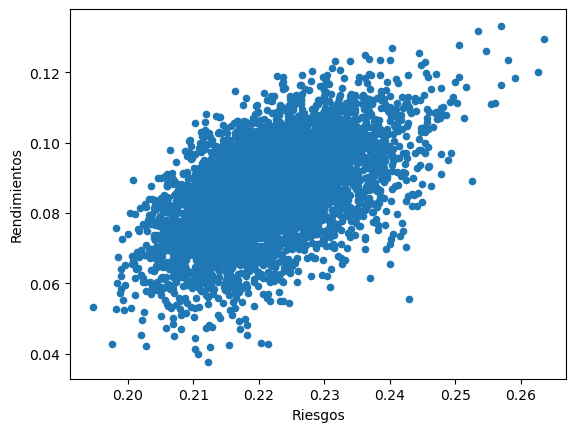

In [26]:
#frontera de eficiencia
Matriz_portafolios.plot(x='Riesgos', y='Rendimientos', kind='scatter');

In [27]:
#varianza minima
varianza_minima = Matriz_portafolios.iloc[Matriz_portafolios['Riesgos'].idxmin()]


C:\Users\jcrom\AppData\Local\Temp\ipykernel_8248\14309161.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=varianza_minima[1], y=varianza_minima[0], color='red',marker='*', s=100);


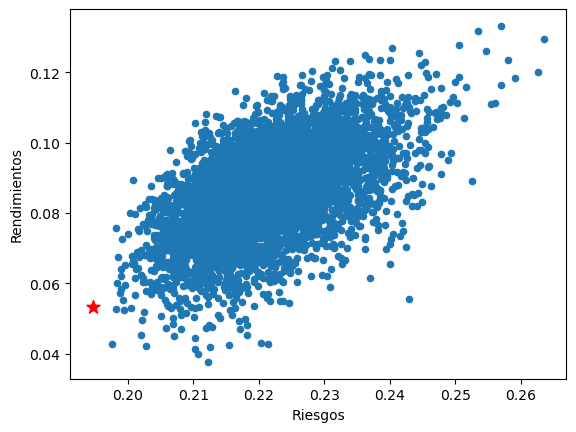

In [32]:
#frontera de eficiencia
Matriz_portafolios.plot(x='Riesgos', y='Rendimientos', kind='scatter')
plt.scatter(x=varianza_minima[1], y=varianza_minima[0], color='red',marker='*', s=100);


In [33]:
# portafolio optimo
risk_free = 0.03
portafolio_optimo = Matriz_portafolios.iloc[((Matriz_portafolios['Rendimientos'] - risk_free) / Matriz_portafolios['Riesgos']).idxmax()]
portafolio_optimo

Rendimientos    0.126893
Riesgos         0.240309
PesoACS.MC      0.060575
PesoAENA.MC     0.010667
PesoBBVA.MC     0.235267
PesoCABK.MC     0.202910
PesoELE.MC      0.003599
PesoFER.MC      0.105612
PesoIBE.MC      0.219020
PesoITX.MC      0.008336
PesoMAP.MC      0.052463
PesoREP.MC      0.060560
PesoTEF.MC      0.040990
Name: 949, dtype: float64

C:\Users\jcrom\AppData\Local\Temp\ipykernel_8248\296694422.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=varianza_minima[1], y=varianza_minima[0], color='red',marker='*', s=100)
C:\Users\jcrom\AppData\Local\Temp\ipykernel_8248\296694422.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x=portafolio_optimo[1], y=portafolio_optimo[0], color='blue',marker='*', s=100);


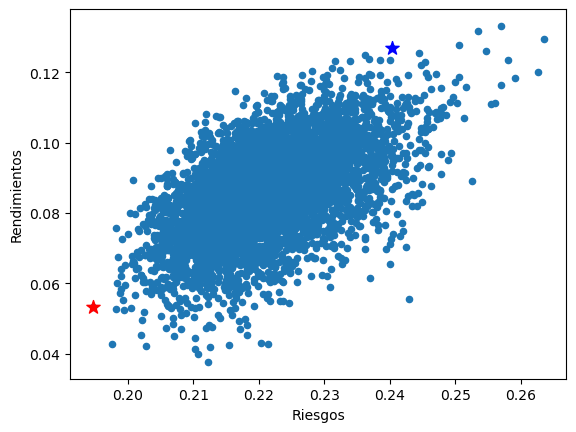

In [34]:
Matriz_portafolios.plot(x='Riesgos', y='Rendimientos', kind='scatter')
plt.scatter(x=varianza_minima[1], y=varianza_minima[0], color='red',marker='*', s=100)
plt.scatter(x=portafolio_optimo[1], y=portafolio_optimo[0], color='blue',marker='*', s=100);

In [40]:
# Gráfico de frontera de eficiencia con Plotly
fig = go.Figure()

# Agregar scatter plot de todos los portafolios
fig.add_trace(go.Scatter(
    x=Matriz_portafolios['Riesgos'],
    y=Matriz_portafolios['Rendimientos'],
    mode='markers',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.6
    ),
    name='Portafolios simulados',
    hovertemplate='<b>Portafolio</b><br>' +
                  'Riesgo: %{x:.4f}<br>' +
                  'Rendimiento: %{y:.4f}<br>' +
                  '<extra></extra>'
))

# Agregar portafolio de mínima varianza
fig.add_trace(go.Scatter(
    x=[varianza_minima['Riesgos']],
    y=[varianza_minima['Rendimientos']],
    mode='markers',
    marker=dict(
        symbol='star',
        size=15,
        color='red',
        line=dict(color='darkred', width=2)
    ),
    name='Mínima varianza',
    hovertemplate='<b>Portafolio de Mínima Varianza</b><br>' +
                  'Riesgo: %{x:.4f}<br>' +
                  'Rendimiento: %{y:.4f}<br>' +
                  '<extra></extra>'
))

# Agregar portafolio óptimo (Sharpe máximo)
fig.add_trace(go.Scatter(
    x=[portafolio_optimo['Riesgos']],
    y=[portafolio_optimo['Rendimientos']],
    mode='markers',
    marker=dict(
        symbol='star',
        size=15,
        color='blue',
        line=dict(color='darkblue', width=2)
    ),
    name='Sharpe máximo',
    hovertemplate='<b>Portafolio Óptimo (Sharpe máximo)</b><br>' +
                  'Riesgo: %{x:.4f}<br>' +
                  'Rendimiento: %{y:.4f}<br>' +
                  '<extra></extra>'
))

# Configurar el layout
fig.update_layout(
    title='Frontera de Eficiencia - Portafolios IBEX 35',
    xaxis_title='Riesgos',
    yaxis_title='Rendimientos',
    hovermode='closest',
    width=800,
    height=600,
    showlegend=True
)

# Mostrar el gráfico
fig.show()